# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 3 (Friday) 11:00 pm </b> </font>

<font color="blue"> Claire Ardern </font>

# I. Introduction

In this lab, we will be creating two linear models: Least-Squares and LMS. These models will be implemented using a class structure. First, we will begin with a review of the data and data exploration that we did in the last lab. Then, once the linear models have been implemented, we will apply them to the dataset and discuss the results.

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the regression data that you examined in Assignment #0. 

We will start by providing a quick overview of the dataset to understand the type of information we are working with as well as to confirm that all requirements are met. Then, we will take a closer look at the data, visualizing the features in several ways in order to identify any cleaning tasks needed for the preprocessing of the dataset. Lastly, we will perform any necessary preprocessing on the dataset.

## II.1. Data Introduction

The selected dataset, HousePrices.csv, contains data pertaining to housing prices. There are a total of 11 input features: 
- Posted By (who listed the property)
- Under Construction
- RERA Approved
- Number of Rooms
- Type of Property 
- Area in Square Feet 
- Ready to Move
- Resale
- Address
- Longitude 
- Latitude 

The target (output) represents the price of the house. This dataset contains 29,451 samples. The reason this dataset was selected for linear regression is because while the features include data of several different types, the target variable is represented as some real number. There is not a specific number of output options and therefore this cannot be a classification problem. This dataset was found on Kaggle. Link: https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge?select=train.csv

## II.2. Data Exploration and Visualization

The first step is to load in the dataset. From there, we can vizualize the data in order to make observations. These observations will allow us to make important decisions in the process of creating a machine learning model. To do this, we have to import certain Python libraries.

In [169]:
# Import the Python libraries needed for loading, preparation, and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can load in the dataset. Once this is done, we can use the simple display command to get a first look at the dataset. This will also confirm whether the dataset has been loaded in Jupyter Notebook correctly.

In [170]:
# Read in the data file.
house_df = pd.read_csv('./HousePrices.csv')

# Display data file to get a first look.
display(house_df)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


We can see a small portion of the data here. However, the majority of the rows cannot be seen and several of the feature columns are not visible without scrolling. If we want to see all of our features at once, we can print a list of the feature names.

In [171]:
# Select and print feature names from the dataset.
feature_names = house_df.columns
print(f'The feature names are:\n{feature_names.values}')

The feature names are:
['POSTED_BY' 'UNDER_CONSTRUCTION' 'RERA' 'BHK_NO.' 'BHK_OR_RK' 'SQUARE_FT'
 'READY_TO_MOVE' 'RESALE' 'ADDRESS' 'LONGITUDE' 'LATITUDE'
 'TARGET(PRICE_IN_LACS)']


It is very important to be aware of all of the features that are included in the dataset. This is the information that will be given to the computer so that it can determine the patterns and correlations between classes. Understanding which information is included as well as what this information means in relation to our classes is incredibly important for the machine learning process. While the computer sees this information only as collections of numbers, we are trying to find the hidden meanings within these collections of numbers. If we do not understand the data that determines the class, we will not be able to make any helpful inferences from our machine learning model and its results. Thankfully, in this case, the features are all self-explanatory.

So, let's take a deeper look into our dataset. What else can we learn from our data before applying it to an algorithm?

In [4]:
df_shape = house_df.shape
print(f'The dataset shape is: {df_shape}')

The dataset shape is: (29451, 12)


It looks like we have 29451 data samples and 12 features based on the shape output given above, although one of the included features will be our target. For our case, 29451 data samples is a good amount. There is enough data included to effectively train our machine learning model but not too much data that we overwhelm our computational resources.

To get a closer look at exactly which data types we are dealing with, let's print the data type for each feature.

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


It looks like the majority of our datatypes are integers and floats. This is desirable for our purposes. However, there are a few features that are listed with a dtype of "object." This means that the data included under these features are represented as strings. When cleaning up the data, these strings would be converted to integer representations in order to allow for computational actions between the columns during the training process.

We can also see that there are no null values within our dataset. This means there are no missing entries in any of our feature columns or our target column. This is desirable as we will not have to replace any null values during the data cleaning process.

Next, we can take another look at our dataset to confirm that we have made the correct inferences about the dataset shape, features, and data types. We can look at the first n rows of our dataset with .head(n) and the last n rows of our dataset with .tail(n) where we can specify a value for n.

In [6]:
house_df.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [7]:
house_df.tail(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29441,Owner,0,0,3,BHK,1500.375094,1,1,"Sector 57 Faridabad,Faridabad",28.320000,77.289381,40.0
29442,Dealer,0,0,3,BHK,1554.968123,1,1,"Sector-10A Airoli,Lalitpur",28.444490,77.004317,200.0
29443,Dealer,0,1,3,BHK,1161.194975,1,1,"Marol,Maharashtra",19.111438,72.878724,220.0
29444,Dealer,1,1,1,BHK,752.049334,0,1,"Mulund (West),Mumbai",19.175900,72.952200,100.0
29445,Owner,0,0,2,BHK,1062.134891,1,1,"Tilakwadi,Belgaum",15.866670,74.500000,40.0
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


Here we can confirm that most of our data is represented as integers or floats while some of the data is represented as strings. We already know that we need to convert the strings to integer representations. Before we do that, let's take a closer look at the data included in those columns.

In [8]:
postedby_counts = house_df['POSTED_BY'].value_counts()
display(postedby_counts)

BHKorRK_counts = house_df['BHK_OR_RK'].value_counts()
display(BHKorRK_counts)

address_counts = house_df['ADDRESS'].value_counts()
display(address_counts)

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

Zirakpur,Chandigarh                   509
Whitefield,Bangalore                  230
Raj Nagar Extension,Ghaziabad         215
Sector-137 Noida,Noida                139
New Town,Kolkata                      131
                                     ... 
Ambika Township,Jivarajpark,Rajkot      1
Cheranalloor,Kochi                      1
Baba Nagar,Bangalore                    1
Barra Devi Naubasta road,Kanpur         1
E3-108, Lake View Recidency,,Vapi       1
Name: ADDRESS, Length: 6899, dtype: int64

We can also visualize this data distribution in a bar graph to make it more readable. We won't include the address feature in these plots since we know that the majority of entries will have different addresses.

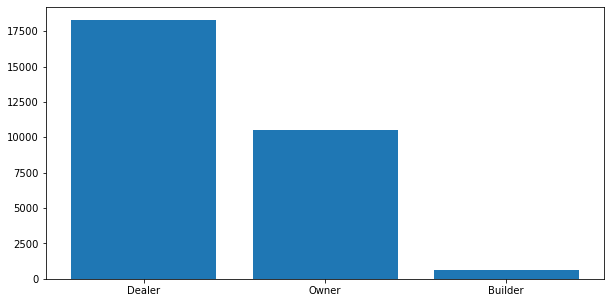

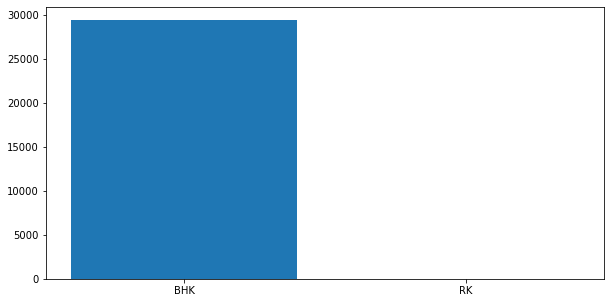

In [9]:
# Resize the figure window to ensure that all axis labels can be read.
plt.rcParams["figure.figsize"] = (10,5)

plt.bar(postedby_counts.index, postedby_counts.values)
plt.show()

plt.bar(BHKorRK_counts.index, BHKorRK_counts.values)
plt.show()

We can clearly see that the most popular poster is a dealer, though it is not clear why this is the case by simply looking at the bar graph. To answer this question requires additional information that is not included in our dataset. This additional information may also reveal a connection - if there is one - between the poster and the house price. The same can be said about the BHK or RK feature. BHK is clearly the most popular, though we cannot determine why that is from the information that is seen in the bar graph. There may be some underlying connection between BHK and the house price. This is the kind of information we are looking for when dealing with machine learning.

We already know we need to replace the string type data in these columns with integer representations. Let's double check that there are no null values that also need to be replaced before we do that.

In [10]:
house_isnull = house_df.isnull()
display(house_isnull)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,False,False,False,False,False,False,False,False,False,False,False,False
29447,False,False,False,False,False,False,False,False,False,False,False,False
29448,False,False,False,False,False,False,False,False,False,False,False,False
29449,False,False,False,False,False,False,False,False,False,False,False,False


This is one way to check for null values. However, the entire dataset cannot be seen and scrolling is necessary to see all of the columns. There is an easier way to check for null values using .any()

In [11]:
househasnull = np.any(house_isnull)
print(f"Value of househasnull is: {househasnull}")

Value of househasnull is: False


We can now clearly see that there are no null values within the dataset. This means we will not have to replace any null values when cleaning up the data.

Now, lets take a closer look at the numerical features. We want to ensure that our numerical features do not have drastically different scales. If one input feature has much larger values than another input feature, the machine learning model will assign larger weights to this feature which is not desirable.

In [12]:
house_describe = house_df.describe()
display(house_describe)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


Here we can see the mean and standard deviation of each feature (along with additional information). This will reveal whether any scaling is necessary. According to the provided tutorial, if we have a large mean and comparably large standard deviation this is acceptable but if we have a small mean and a very large standard deviation this can cause trouble for learning as our values for that feature will vary drastically.

None of the mean and standard deviations for any one feature stand out as troublesome. However, the target (price_in_lacs) does have a standard deviation that is larger than the mean. Since this is our target feature it should not cause any problems. This should not need to be resolved in order to apply a machine learning algorithm.

The last visualization and exploration step to perform here is an observation of the correlations between the features.
We can easily plot each feature against every other feature to see if there are any trends between features.

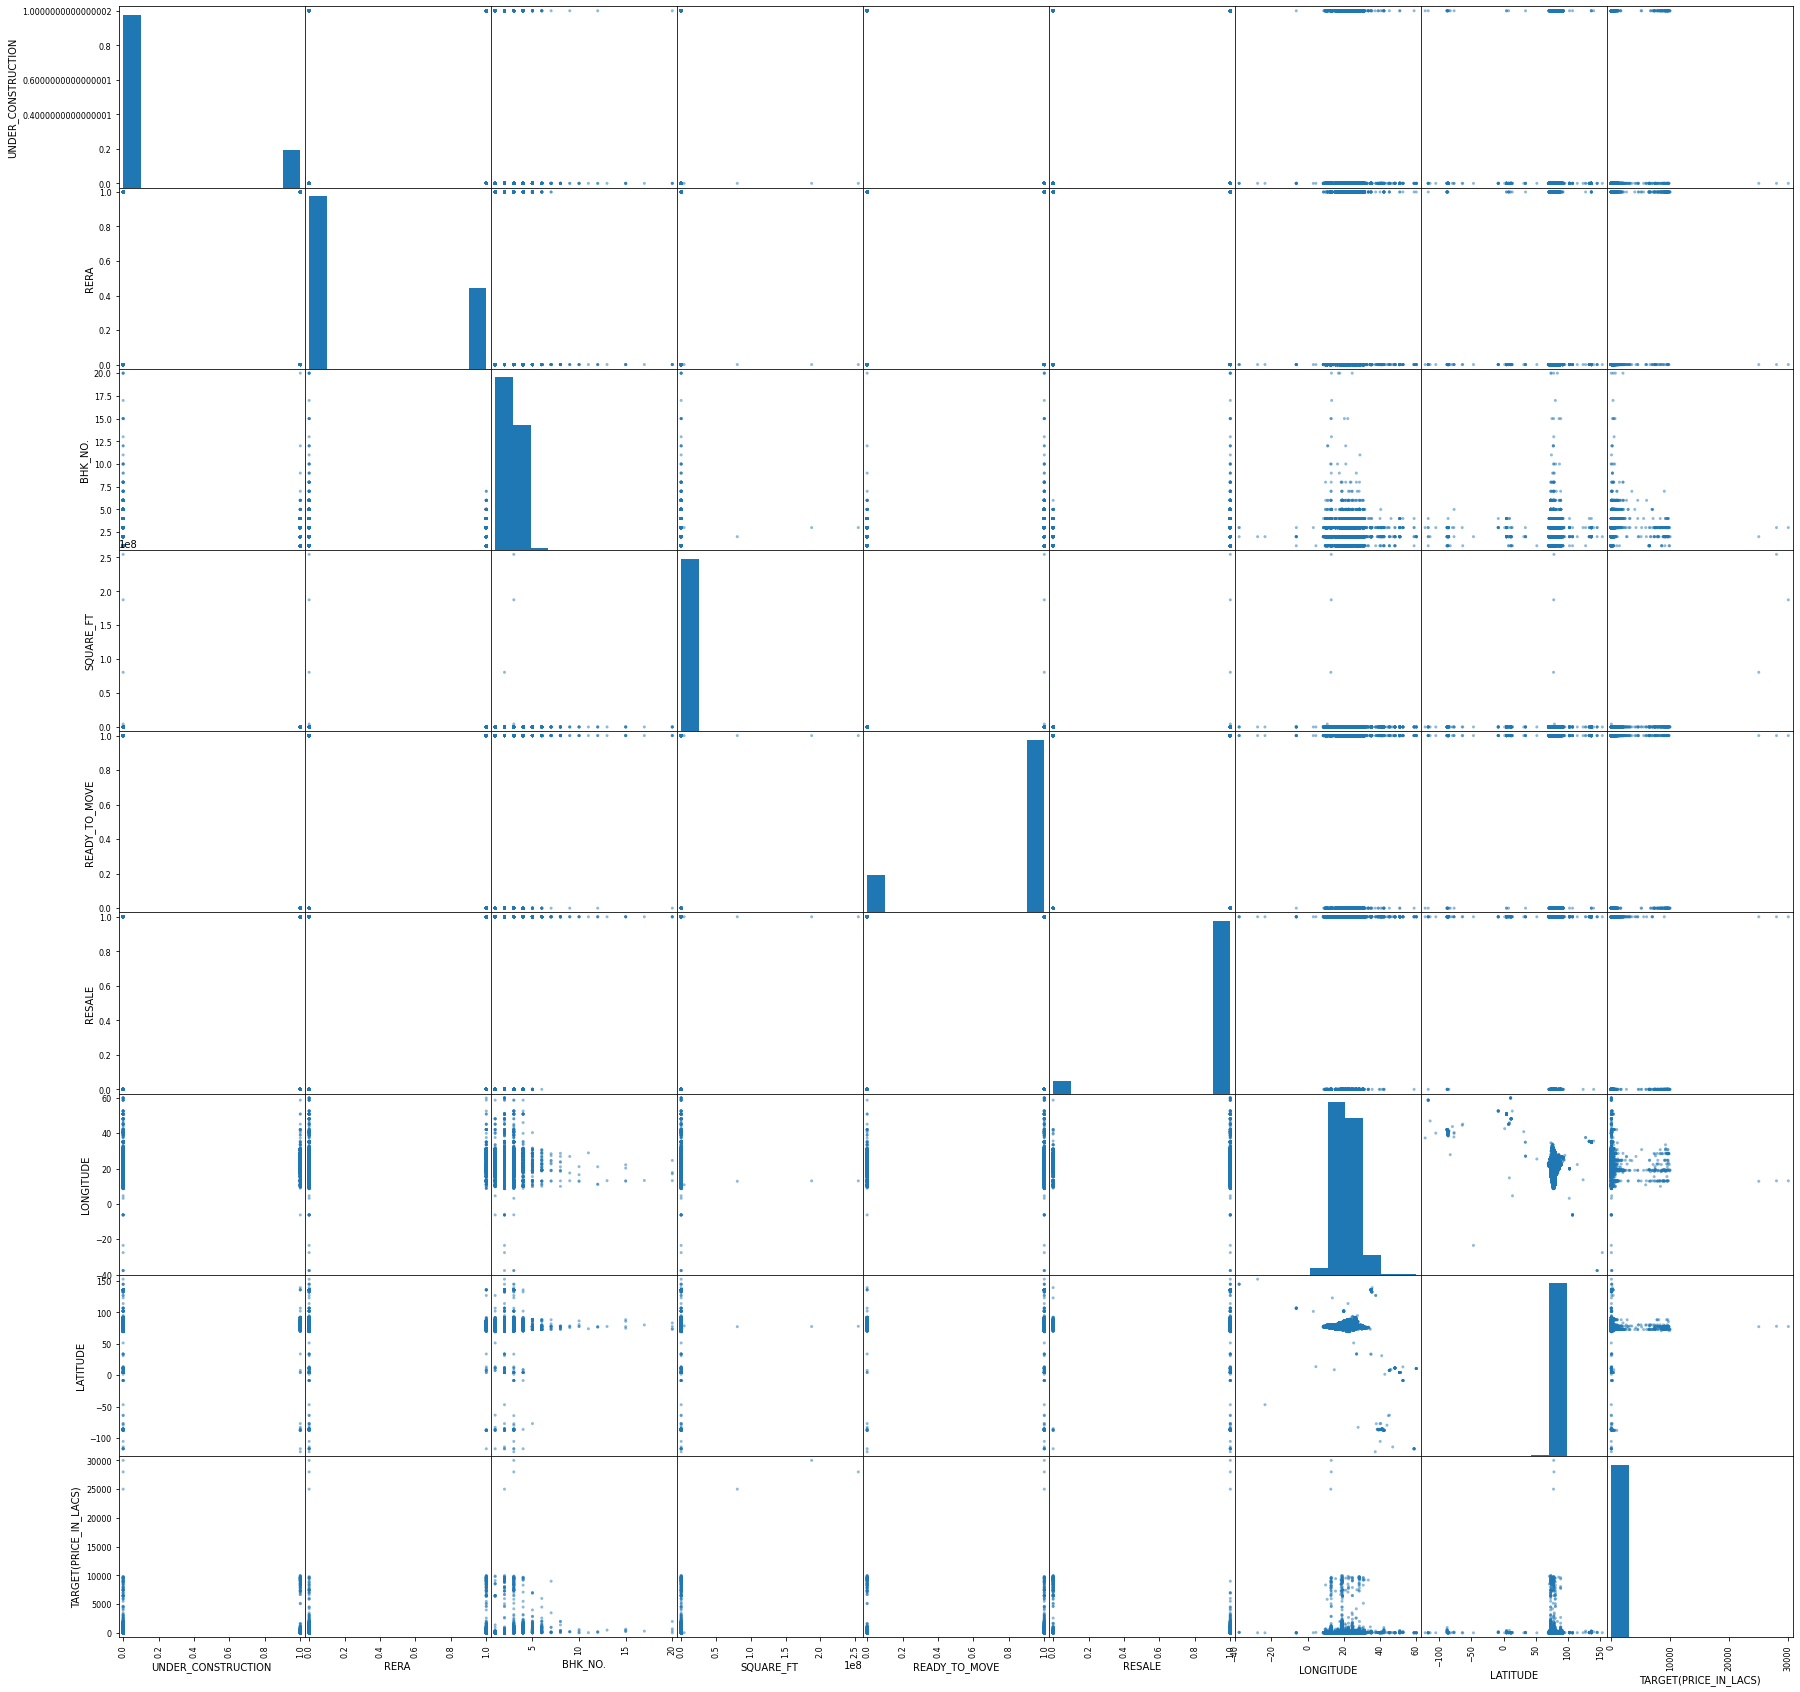

In [13]:
pd.plotting.scatter_matrix(house_df, figsize=(30, 30))
plt.show()

This plot is fairly complex and hard to interpret. It is difficult to determine any relationships between the features here. Another possibility is to plot each feature against the target. This may reveal any trends or correlations that can be useful when applying the machine learning model.

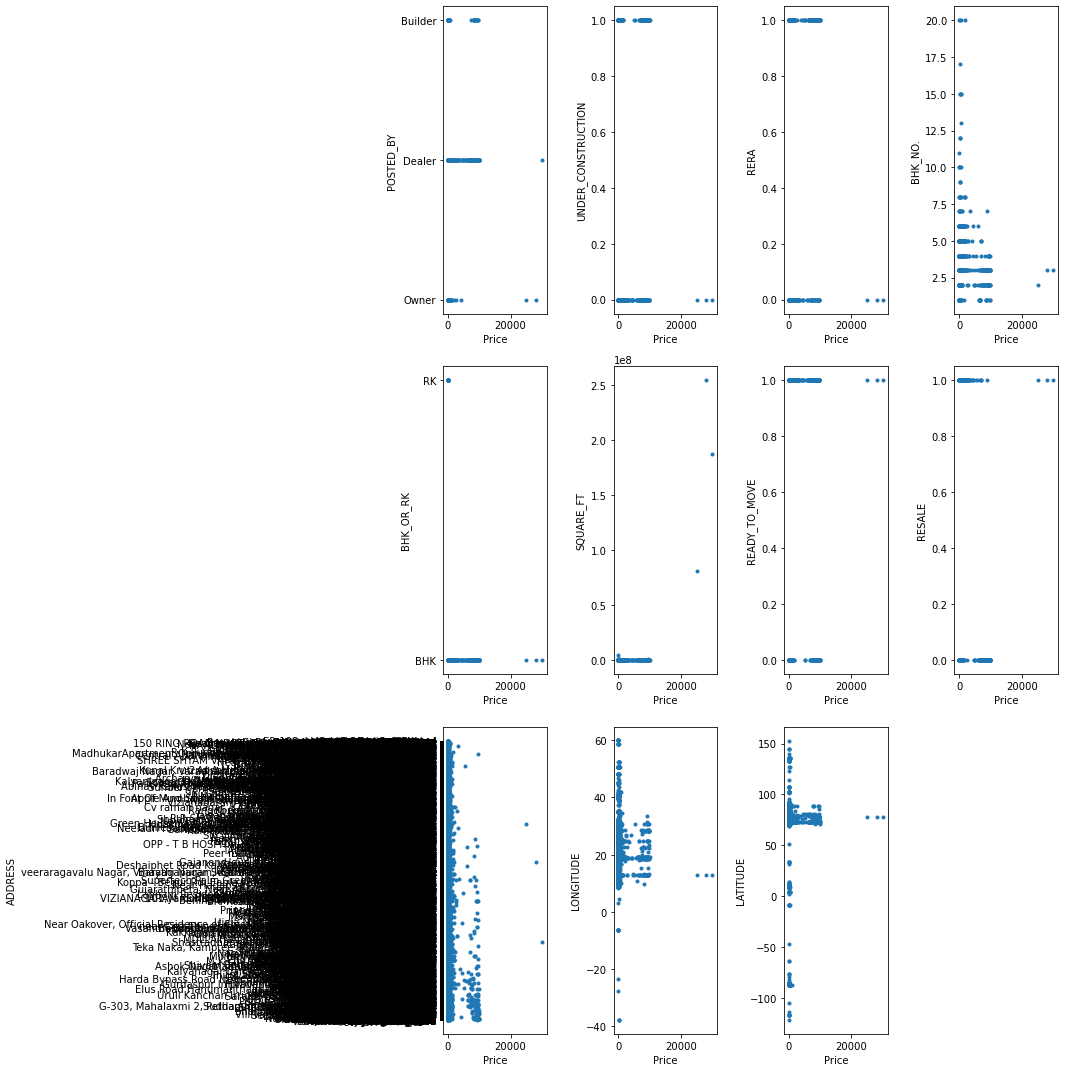

In [14]:
X = house_df.iloc[:, :-1]
y = house_df['TARGET(PRICE_IN_LACS)']

fig, _ = plt.subplots(figsize=(15, 15))
for idx, column_name in enumerate(X.columns.values):
    # print(idx, column_name)
    plt.subplot(3, 4, idx+1)
    plt.plot(y, X[column_name], '.')
    plt.ylabel(column_name)
    plt.xlabel('Price')
fig.tight_layout()

It is still hard to see any correlations between the features and the label here. Because there are so many unique entries in the address column, the plots here become cluttered. We can get a better idea of which features may correlate by computing the correlation score between feature pairs. The corr function makes this simple.

In [15]:
corr_matrix = house_df.corr()
corr_matrix

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


There does not seem to be much correlation between features here. Only the resale, ready_to_move, and RERA features seem to show any real level of correlation. This may indicate that the effective application of a machine learning model could be difficult.

Now that we have completed the data exploration, let's recap what we discovered. First, we noted that any data is a string format will need to be converted to an integer representation in order to make computations within the machine learning process possible. We also noted that our features may need to be scaled as the ranges differ greatly between numerical features. Thankfully, there were no other cleaning chores that were needed for this dataset.

## II.3. Data Cleaning

During our exploration and visualization of this dataset, we discovered two different cleaning tasks to perform:

- Convert string data to integer representation
- Scale data

Start with the string data. The provided tutorial recommends the use of one-hot encodings to resolve this issue. There are several ways we can go about creating one-hot encodings. When using Pandas, the easiest way is to simply call the get_dummies() function and pass forestfire_df to it to convert all the categorical features to one-hot encodings.

In [16]:
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [172]:
one_hot_df = pd.get_dummies(house_df)
display(one_hot_df)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,...,"ADDRESS_vasundhara nagar,Jalna","ADDRESS_veeraragavalu Nagar, Vinayagapuram, Kathirvedu Village, Ambattur Taluk,Chennai","ADDRESS_vidyut nagar,Rajkot","ADDRESS_vikas nagar,Karnal","ADDRESS_vinayaka,Varanasi","ADDRESS_virar,Palghar","ADDRESS_vishakoderu,Bhimavaram","ADDRESS_walkeshwari nagari,Jamnagar","ADDRESS_west mambalam,Chennai","ADDRESS_yelahanka/Jakkur,Bangalore"
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,0,...,0,0,0,0,0,0,0,0,0,0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,0,...,0,0,0,0,0,0,0,0,0,0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,0,...,0,0,0,0,0,0,0,0,0,0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
one_hot_df_shape = one_hot_df.shape
print(f"Shape of one_hot_df is: {one_hot_df_shape}")

Shape of one_hot_df is: (29451, 6913)


You should see that we now have over 6500 features! The one-hot encoding has split the feature columns. Since there are so many different string values in the address column, this method may not be the best for this specific case. We can try applying the one-hot encoding to all other string type columns besides "address." When applying a machine learning model, we would likely remove this column anyways.

If we want this one-hot encoding to work with our Sklearn pipeline we need to create a wrapper class. Below we do so by inheriting from BaseEstimator and TransformerMixin and defining the fit() and transform() methods.

In [174]:
class OneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = None
    
    def fit(self, X: pd.DataFrame, y: pd.DataFrame = None):
        # We don't need to set/learn any variables so
        # we just need to return a reference to the object with 'self'
        return self
    
    def transform(self, X: pd.DataFrame, y: pd.DataFrame = None):
        one_hot = pd.get_dummies(X)
        self.feature_names = one_hot.columns
        
        return one_hot

In [175]:
one_hot = OneHotEncoding()
ohe_df = one_hot.fit_transform(house_df[['POSTED_BY', 'BHK_OR_RK']])
display(ohe_df)

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK
0,0,0,1,1,0
1,0,1,0,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,1,0,1,0
...,...,...,...,...,...
29446,0,0,1,1,0
29447,0,0,1,1,0
29448,0,1,0,1,0
29449,0,0,1,1,0


To practice the pipeline feature, lets practice building a simple pipeline here. Doing this will convert the dataframe to a numpy array. We will have to reverse this process afterwards.

In [176]:
stages = [
    ('one_hot',  OneHotEncoding(), ['POSTED_BY', 'BHK_OR_RK']),
]

before_pipe = ColumnTransformer(stages, remainder='passthrough',)

In [177]:
clean_array = before_pipe.fit_transform(house_df)
clean_array

array([[0, 0, 1, ..., 12.96991, 77.59796, 55.0],
       [0, 1, 0, ..., 12.274538, 76.644605, 51.0],
       [0, 0, 1, ..., 12.778033, 77.632191, 43.0],
       ...,
       [0, 1, 0, ..., 26.928785, 75.828002, 27.1],
       [0, 0, 1, ..., 12.90015, 80.22791, 67.0],
       [0, 1, 0, ..., 26.832353, 75.841749, 27.8]], dtype=object)

Now let's convert back to a dataframe.

In [178]:
cat_feature_names = before_pipe.transformers_[0][1].feature_names
cat_feature_names

Index(['POSTED_BY_Builder', 'POSTED_BY_Dealer', 'POSTED_BY_Owner',
       'BHK_OR_RK_BHK', 'BHK_OR_RK_RK'],
      dtype='object')

In [179]:
old_feature_names = house_df.drop(['TARGET(PRICE_IN_LACS)', 'POSTED_BY', 'BHK_OR_RK'], axis=1).columns
old_feature_names

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'ADDRESS', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

In [180]:
new_feature_names = list(cat_feature_names) + ['TARGET(PRICE_IN_LACS)'] + list(old_feature_names)
new_feature_names

['POSTED_BY_Builder',
 'POSTED_BY_Dealer',
 'POSTED_BY_Owner',
 'BHK_OR_RK_BHK',
 'BHK_OR_RK_RK',
 'TARGET(PRICE_IN_LACS)',
 'UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'SQUARE_FT',
 'READY_TO_MOVE',
 'RESALE',
 'ADDRESS',
 'LONGITUDE',
 'LATITUDE']

In [181]:
clean_df = pd.DataFrame(clean_array, columns=new_feature_names)
clean_df

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,TARGET(PRICE_IN_LACS),UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,0,0,1,1,0,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.96991,77.59796,55.0
1,0,1,0,1,0,0,0,2,1275.0,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,0,0,1,1,0,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,0,0,1,1,0,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.6423,77.3445,62.5
4,0,1,0,1,0,1,0,2,999.009247,0,1,"New Town,Kolkata",22.5922,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,1,1,0,0,0,3,2500.0,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,0,0,1,1,0,0,0,2,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,0,1,0,1,0,0,0,2,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,0,0,1,1,0,0,0,2,927.079009,1,1,"Sholinganallur,Chennai",12.90015,80.22791,67.0


With the string values taken care of, our next task is to scale the data. To do this, we must first split the dataset into X and Y subsets.

In [182]:
y = clean_df['TARGET(PRICE_IN_LACS)']
display(y)

0        0
1        0
2        0
3        0
4        1
        ..
29446    0
29447    0
29448    0
29449    0
29450    0
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: object

In [183]:
X = clean_df.drop(['TARGET(PRICE_IN_LACS)'], axis=1)
display(X)

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,0,0,1,1,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.96991,77.59796,55.0
1,0,1,0,1,0,0,2,1275.0,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,0,0,1,1,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,0,0,1,1,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.6423,77.3445,62.5
4,0,1,0,1,0,0,2,999.009247,0,1,"New Town,Kolkata",22.5922,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,1,1,0,0,3,2500.0,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,0,0,1,1,0,0,2,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,0,1,0,1,0,0,2,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,0,0,1,1,0,0,2,927.079009,1,1,"Sholinganallur,Chennai",12.90015,80.22791,67.0


Now we must create a testing set and a training set. Sklearn provides a function for this.

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Now let's confirm that this split was successful and that our data sets are still in the correct shape.

In [30]:
X_train.shape

(23560, 14)

In [31]:
y_train.shape

(23560,)

In [32]:
X_test.shape

(5891, 14)

In [33]:
y_test.shape

(5891,)

Everything looks to be in order. Now we can finally standardize the data. The class provided in the tutorial will be used here.

In [34]:
class Standardization(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self
    
    def transform(self, X):
        return (X  - self.mean) / self.std

In [35]:
scale = Standardization()
scaled_df = scale.fit_transform(X_train)
display(scaled_df)

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,ADDRESS,BHK_NO.,BHK_OR_RK_BHK,BHK_OR_RK_RK,LATITUDE,LONGITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,READY_TO_MOVE,RERA,RESALE,SQUARE_FT,UNDER_CONSTRUCTION
20898,0.192632,-0.007245,0.027651,-0.027651,-0.181214,1.088281,-0.148,0.782684,-0.747473,0.278161,-0.444198,NaN,-2.136464,-0.682972
28923,0.981127,-0.006587,0.027651,-0.027651,-0.118844,0.580803,-0.148,-1.277655,1.33784,0.278161,0.684258,NaN,0.468063,-0.682972
12216,0.546243,-0.005695,0.027651,-0.027651,0.341057,0.150311,-0.148,0.782684,-0.747473,0.278161,4.069628,NaN,-2.136464,1.464189
6216,1.161347,-0.006121,0.027651,-0.027651,0.026057,0.049652,-0.148,0.782684,-0.747473,0.278161,0.684258,NaN,0.468063,-0.682972
22404,0.30169,-0.00713,0.027651,-0.027651,-0.161369,-0.398064,-0.148,-1.277655,1.33784,0.278161,-0.444198,NaN,0.468063,-0.682972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1.225009,-0.006451,0.027651,-0.027651,0.026057,0.006056,-0.148,0.782684,-0.747473,0.278161,0.684258,NaN,0.468063,-0.682972
5390,0.202748,-0.006961,0.027651,-0.027651,-0.133019,1.094927,-0.148,0.782684,-0.747473,-3.595045,0.684258,NaN,-2.136464,-0.682972
860,-0.511805,-0.006909,0.027651,-0.027651,-0.052694,-0.198896,-0.148,0.782684,-0.747473,0.278161,-0.444198,NaN,-2.136464,1.464189
15795,-0.068442,-0.006888,0.027651,-0.027651,-0.189719,0.422086,-0.148,-1.277655,1.33784,0.278161,0.684258,NaN,0.468063,-0.682972


In [36]:
scale = Standardization()
scaled_df = scale.fit_transform(X_test)
display(scaled_df)

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,ADDRESS,BHK_NO.,BHK_OR_RK_BHK,BHK_OR_RK_RK,LATITUDE,LONGITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,READY_TO_MOVE,RERA,RESALE,SQUARE_FT,UNDER_CONSTRUCTION
21992,0.185048,-0.017692,0.03193,-0.03193,-0.14329,1.091501,-0.142349,0.774842,-0.742347,0.263327,0.721247,NaN,0.468419,-0.681685
29060,1.164115,-0.017585,0.03193,-0.03193,0.039735,0.023032,-0.142349,0.774842,-0.742347,0.263327,0.721247,NaN,0.468419,-0.681685
6778,1.19361,-0.017789,0.03193,-0.03193,-0.143154,0.047951,-0.142349,0.774842,-0.742347,0.263327,-0.455072,NaN,0.468419,-0.681685
4730,0.529228,-0.017412,0.03193,-0.03193,-0.116059,-0.299424,-0.142349,-1.290585,1.347078,0.263327,0.721247,NaN,0.468419,-0.681685
28825,0.220538,-0.01775,0.03193,-0.03193,-0.163069,1.09455,-0.142349,0.774842,-0.742347,0.263327,-0.455072,NaN,-2.134841,-0.681685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16895,-1.35628,-0.017706,0.03193,-0.03193,-0.122833,0.064243,-0.142349,0.774842,-0.742347,0.263327,-0.455072,NaN,0.468419,-0.681685
795,-0.458309,-0.017203,0.03193,-0.03193,0.175209,-0.290688,-0.142349,0.774842,-0.742347,0.263327,0.721247,NaN,0.468419,-0.681685
19099,-1.253119,-0.017676,0.03193,-0.03193,-0.075417,-0.099036,-0.142349,0.774842,-0.742347,0.263327,-0.455072,NaN,0.468419,-0.681685
21782,-0.366045,-0.017714,0.03193,-0.03193,-0.055096,-0.375236,-0.142349,0.774842,-0.742347,0.263327,-0.455072,NaN,0.468419,-0.681685


We have now completed all of the cleaning tasks that were found to be necessary for this dataset.

# III. Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description

In general, Linear Regression is a linear method to finding the relationship between input and output data. This linear relationship is defined by the following formula:

$$
y = mx + b
$$

In this formula, the x values represent the input data points while the y values represent the output data points. The two remaining variables, m and b, represent the slope and bias of the linear relationship. All together, this equation creates a line that will eventually define the relationhip between the input and output. We can then use this line to predict the output values for new, unseen input values. However, in its current state, there are no numerical values for m and b. These values will be determined during the training process. 

When we are training the linear model to fit our data, we are attempting to find the values for m and b that will most accurately define the relationship between x and y. To do so, we must calculate the error for each potential linear relationship, or, in other words, each potential value of m and b. In this lab, we will discuss two possible ways to calculate this error: Least Squares and Least Mean Squares (LMS). 

## III.1. Least Squares

The Least Squares method is a process of minimizing the error between our linear model and the data. This error is the difference between the predicted output and the actual output. With this method, we take the difference between the predicted output and the actual output and square it, hence the name Least Squares. 

$$
E(w) = \sum_{i=1}^N \Big( f(x_i; w_i) - t_i \Big)^2,
$$

The reason that we square the difference is because of the potential for a negative value. If the difference between the predicted output and actual output is a negative number, we might think this means we have negative error. Squaring this value will resolve this issue as any negative numbers will become positive.

The closed form solution for Least Squares can be seen below. 

$$
E(w) = (Xw - t)^2.
$$

To implement this method in our logistic regression, we use the closed form solution to derive an equation to calculate the weights (m and b). This solution can be seen below. 

$$
w = (X^TX)^{-1}X^Tt
$$

## III.2. Least Mean Squares (LMS)

The Least Mean Squares method is an iterative process of minimizing the error between our linear model and the data. This method is very similar to Least Squares except instead of finding weights to fit the data using one calculation, we slowly adjust our weights to fit the data by observing the error while we iterate through the data and the change in error as we adjust the weights. This is done by taking the derivative of the error equation. 

$$
\begin{align}
\nabla E_k = \frac{\partial E}{\partial w^{(k)}} &= \frac{\partial }{\partial w^{(k)}}\Big( f(x_k; w^{(k)}) - t_k \Big)^2 \\
\end{align}
$$

To implement this method in our logistic regression, we must derive the solution equation for the weights from the above equation. This solution can be seen below. 

$$
w^{(k+1)} = w^{(k)} - \alpha(w^{(k)T}X_k - t_k)X_k
$$ 

In this equation, the value of alpha is our learning rate. The learning rate can be adjusted manually to determine how drastically the weights will be adjusted at each iteration. Higher learning rates might make the algorithm over-adjust, making it difficult to converge at the optimal weight values. On the other hand, if the learning rate is too low, the algorithm will adjust the weight too slowly and take a long time (many iterations) to converge at the optimal weight values, possibly more iterations than we have alloted for. For this reason, it is important to pick an appropriate learning rate with this method.


## III.3. Python Implementation

The implementation of either of the aforementioned methods is simple. We already have the necessary equations for our linear relationship and error minimization. So, the only task needed to be done is to write these equations in the Python language. This is done by representing the inputs and outputs as matrices while the weights (values of m and b) are combined into a single matrix. Then, we use our equations to find the best values for the weights. Once this is done, we use the calculated weights to predict an output by using our equation for the linear relationship. In Python, this is done with matrix multiplication between the input matrix and the weights matrix. 

The implementation for both methods can be seen below with examples.

### Super Classs Definition

These are the super class definitions for the general linear model. The abstract methods will enable us to have unified interfaces for child classes to be overridden. 

In [37]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

Inheriting the super class, we can define two difference classes for Least Squares and Least Mean Square algorithms. 

### Least Squares

LinearRegress class implements the least square solutions. The train() function updates the weights using least squares solution and use() returns the predictions for the argument X by using the trained weight w. 

In [160]:
from sklearn.model_selection import train_test_split

# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # Train Least-Squares Model
    def train(self, X, T):

        X = self.add_ones(X)
        
        # Find the optimal weights using the closed form solution.
        self.w = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ T
          
        pass
    
    # Apply the Learned Model to Data X
    def use(self, X):

        X = self.add_ones(X)
        
        y = X @ self.w
            
        return y 

### Least Mean Squares

LMS class implements the least mean squares solution. The train_step() function updates the weights for a single input vector x and one target label. The train() function will simply call train_step() in a loop to learn incrementally for the batch data. 

In [159]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # Batch training by using train_step function
    def train(self, X, T):
        
        N = X.shape[0]
        
        for k in range(N):
            
            self.train_step(X[k], T[k])
        
        pass
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        
        x = x.reshape((1, -1))
        
        x = self.add_ones(x)
        
        if self.w is None:
            self.w = np.random.rand(x.shape[1])
            self.w = self.w.reshape(-1, 1)

        
        # Prediction for sample
        y = x @ self.w
        
        # Update of weights
        num = (y - t) * x
        num = np.transpose(num)
        self.w = self.w - self.alpha*num
        
        pass 
    
    # apply the current model to data X
    def use(self, X):
        
        X = self.add_ones(X)
        
        y = X @ self.w
            
        return y

### Usage Examples

In [188]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

(11, 1)


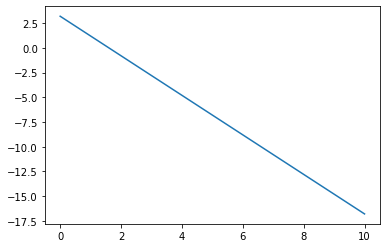

In [189]:
X = np.linspace(0,10, 11).reshape((-1, 1))
print(X.shape)
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

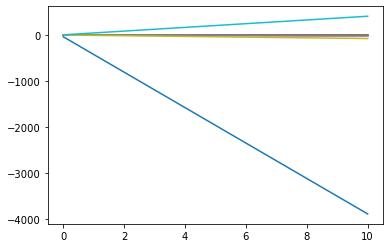

In [190]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

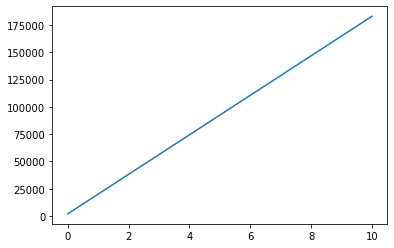

In [191]:
lms.train(X, T)
plt.plot(lms.use(X))

# IV. Experiments

We will now apply both the Least Squares and LMS methods to the data. Hopefully, we will be able to create a model that can accuractely predict the relationship between the input attributes and the output house price.

## IV.1. Application of Least Squares

First, lets apply the Least Squares model.

In [187]:
# Last minute cleaning. Remove resale column to allow for implementation.  
#X_train.drop(['RESALE'], axis = 1)

#X_train = X_train.astype('int32')

#X_train = np.hstack(X_train).reshape((-1,1))

# Train the model.
ls.train(X_train, y_train)

ValueError: invalid literal for int() with base 10: 'POSTED_BY_Builder'

## IV.2. Results of Least Squares

In [ ]:
from sklearn import metrics

# Calculate accuracy score
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

# Plot model (line)
plt.plot(lms.use(X_train))

## IV.3. Application of LMS

In [163]:
lms.train(X_train, y_train)

KeyError: 0

## IV.4. Results of LMS

In [ ]:
from sklearn import metrics

# Calculate accuracy score
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

# Plot model (line)
plt.plot(lms.use(X_train))

# V. Conclusions

Overall, this was a fairly simple assignment. The creation and implementation of the Linear Regression model with Least Squares and LMS is not complex so long as we have a solid understanding of the concepts. However, the assignment structure made the process of creating and implimenting the models much more complex than it could have been. This particular implementation with the class structure was rather confusing and required students to implement the model in the exact right way to fit the predefined functions and classes. This was particularly frustrating for me because in the past I have already created and implemented a machine learning linear model that works beautifully with this dataset. In the future, I would recommend giving students more breathing room as far as their implementation style. 

# References

No outside sources were referenced in the completion of this assignment.

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [161]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    model.w = np.zeros((X.shape[1]+1, T.shape[1]))
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
